In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
csv_file_path = "../../data/Overath/final_dataset.csv"


df = pd.read_csv(csv_file_path)

display(df.head())

,binder_id,target_id,binder_chain,target_chains,target_chain_range,msa_info,binder,source,A_seq,A_length,...,af3_res_above_contact_thres,spatialPPI_poi,af3_ipae,boltz1_ipae,colab_ipae,af2_dSAP_dSASA_ratio,boltz1_dSAP_dSASA_ratio,colab_dSAP_dSASA_ratio,af3_dSAP_dSASA_ratio,input_dSAP_dSASA_ratio
0,2bnr_04_4000_145_0_11,pMHC_NY1,A,"[""B"", ""C"", ""D""]","[""1:276"", ""277:376"", ""377:385""]","[""A:no_msa"", ""B:run_msa"", ""C:run_msa"", ""D:run_...",False,pMHC screening NY1,STRERLYVLSGEAALAMAEAQAIAAEAGAPEEALLAVQRAGTALGL...,104.0,...,93.0,0.573810,3.686,3.548,4.277,-0.009898,-0.010134,-0.010398,-0.009657,-0.009622
1,2bnr_05_4200_137_0_3,pMHC_NY1,A,"[""B"", ""C"", ""D""]","[""1:276"", ""277:376"", ""377:385""]","[""A:no_msa"", ""B:run_msa"", ""C:run_msa"", ""D:run_...",False,pMHC screening NY1,EEVKKLVEELAKTILEGLKKLAELVPAAATDPEARRRLEREAGEVS...,123.0,...,93.0,0.804594,4.602,3.531,4.922,-0.010073,-0.010326,-0.012165,-0.008211,-0.009243
2,2bnr_16_22_3_7,pMHC_NY1,A,"[""B"", ""C"", ""D""]","[""1:276"", ""277:376"", ""377:385""]","[""A:no_msa"", ""B:run_msa"", ""C:run_msa"", ""D:run_...",False,pMHC screening NY1,AAAAAAAVAAEKAELATLKAIYKLKELSPEVGAKAEEILDTFYEGL...,144.0,...,68.0,0.798687,5.846,4.922,5.977,-0.014249,-0.013872,-0.014227,-0.012550,-0.014128
3,AKAP9_binder_10_dldesign_0_af2pred,pMHC_SILSY1,A,"[""B"",""C"",""D""]","[""1:274"",""275:373"",""374:383""]","[""A:no_msa"", ""B:run_msa"", ""C:run_msa"", ""D:run_...",False,pMHC screening SILSY1,AKLEAFKAKLEAKRAELTAEAAELVDQSIAAEKAGEDLLAQLLSIA...,124.0,...,84.0,0.592181,3.808,3.209,5.304,-0.011370,-0.012508,-0.011275,-0.010104,-0.011033
4,AKAP9_binder_17,pMHC_SILSY1,A,"[""B"",""C"",""D""]","[""1:274"",""275:373"",""374:383""]","[""A:no_msa"", ""B:run_msa"", ""C:run_msa"", ""D:run_...",False,pMHC screening SILSY1,SRREELERRARELIERALREARELVAEAIAALRAGRDLLAQALSLA...,124.0,...,94.0,0.524022,5.120,4.627,4.502,-0.015567,-0.016261,-0.014289,-0.013580,-0.015611


In [5]:
df.info()

print(f"Dataset Shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Columns: 312 entries, binder_id to input_dSAP_dSASA_ratio
dtypes: float64(263), int64(6), object(43)
memory usage: 8.8+ MB
Dataset Shape: (3676, 312)


Counts:
 binder
False    3275
True      394
Name: count, dtype: int64

Percentages:
 binder
False    89.261379
True     10.738621
Name: proportion, dtype: float64


C:\Users\Jan R\AppData\Local\Temp\ipykernel_6952\629441240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


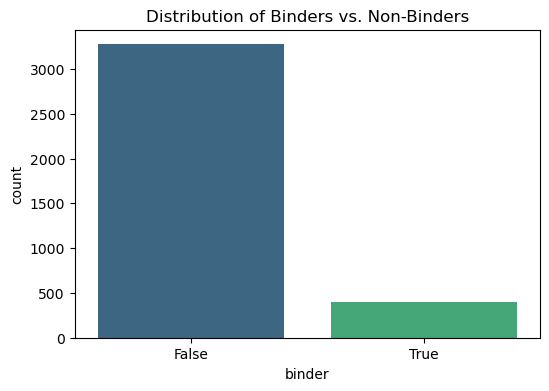

In [ ]:
target_col = 'binder' 

counts = df[target_col].value_counts()
percentage = df[target_col].value_counts(normalize=True) * 100

print("Counts:\n", counts)
print("\nPercentages:\n", percentage)


plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Distribution of Binders vs. Non-Binders')
plt.show()

In [7]:
key_metrics = [col for col in df.columns if 'ipSAE' in col or 'ipTM' in col or 'pLL' in col]

print("Missing values in key metrics:")
print(df[key_metrics].isnull().sum())

Missing values in key metrics:
boltz1_ipSAE_min                   11
boltz1_ipSAE_max                   11
boltz1_ipSAE_avg                   11
boltz1_ipSAE_min_in_calculation    11
boltz1_ipSAE_d0chn                 11
boltz1_ipSAE_d0dom                 11
af3_ipSAE_min                       7
af3_ipSAE_max                       7
af3_ipSAE_avg                       7
af3_ipSAE_min_in_calculation        7
af3_ipSAE_d0chn                     7
af3_ipSAE_d0dom                     7
colab_ipSAE_min                    26
colab_ipSAE_max                    26
colab_ipSAE_avg                    26
colab_ipSAE_min_in_calculation     26
colab_ipSAE_d0chn                  26
colab_ipSAE_d0dom                  26
dtype: int64


In [ ]:
metrics_to_check = [
    'af3_ipSAE_min', # The "New" reliable metric [cite: 1737]
    'af3_ipTM',      
    'boltz1_ipTM',   
    'colab_ipTM'
]

existing_metrics = [m for m in metrics_to_check if m in df.columns]

display(df[existing_metrics].describe())

if 'AF3_ipSAE_min' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='AF3_ipSAE_min', hue=target_col, kde=True, element="step")
    plt.title('Distribution of AF3 ipSAE_min by Binding Status')
    plt.show()

,af3_ipSAE_min
count,3669.000000
mean,0.232861
std,0.262594
min,0.000000
25%,0.015000
50%,0.081000
75%,0.490000
max,0.852000
